In [1]:
import pandas as pd


In [2]:
df=pd.read_excel('F:\datasets\Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


<AxesSubplot:>

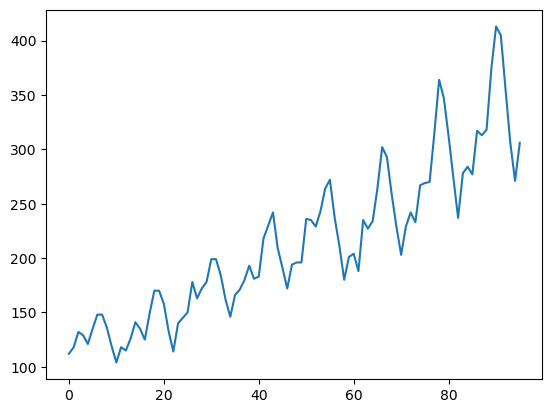

In [5]:
df.Passengers.plot()

In [6]:
import statsmodels.formula.api as smf 

In [7]:
#muliplicative seasonality req log y, t, all month col except dec for model 

In [8]:
import numpy as np

In [9]:
df['log_y']=np.log(df['Passengers'])
df['t']=np.arange(1,len(df)+1)
df['t_square']=df['t']**2
df

,Month,Passengers,log_y,t,t_square
0,1995-01-01,112,4.718499,1,1
1,1995-02-01,118,4.770685,2,4
2,1995-03-01,132,4.882802,3,9
3,1995-04-01,129,4.859812,4,16
4,1995-05-01,121,4.795791,5,25
...,...,...,...,...,...
91,2002-08-01,405,6.003887,92,8464
92,2002-09-01,355,5.872118,93,8649
93,2002-10-01,306,5.723585,94,8836
94,2002-11-01,271,5.602119,95,9025


In [10]:
df['mon']=df['Month'].dt.month

In [11]:
df

,Month,Passengers,log_y,t,t_square,mon
0,1995-01-01,112,4.718499,1,1,1
1,1995-02-01,118,4.770685,2,4,2
2,1995-03-01,132,4.882802,3,9,3
3,1995-04-01,129,4.859812,4,16,4
4,1995-05-01,121,4.795791,5,25,5
...,...,...,...,...,...,...
91,2002-08-01,405,6.003887,92,8464,8
92,2002-09-01,355,5.872118,93,8649,9
93,2002-10-01,306,5.723585,94,8836,10
94,2002-11-01,271,5.602119,95,9025,11


In [12]:
df1=pd.get_dummies(data=df['mon'],prefix='Month')

In [13]:
df=pd.concat([df,df1],axis=1)


In [14]:
df

,Month,Passengers,log_y,t,t_square,mon,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1995-01-01,112,4.718499,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,4.770685,2,4,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,4.882802,3,9,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4.859812,4,16,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,4.795791,5,25,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,6.003887,92,8464,8,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,5.872118,93,8649,9,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,5.723585,94,8836,10,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,5.602119,95,9025,11,0,0,0,0,0,0,0,0,0,0,1,0


In [15]:
train=df.head(70)
test=df.tail(26)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
# 127.83693479585908
mullin= smf.ols('log_y~t+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11+Month_12',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

11.724791415287921

In [18]:
linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))   #xtest
rmse_linear = np.sqrt(mean_squared_error(test['Passengers'], pred_linear))  #ytest,ypred
rmse_linear

48.30985585336206

In [19]:
#Exponential

Exp = smf.ols('log_y~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(test['Passengers'], pred_Exp))
rmse_Exp

298.12659699761343

In [20]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_square"]]))
rmse_Quad = np.sqrt(mean_squared_error(test['Passengers'],pred_Quad))
rmse_Quad

43.89814496742655

In [21]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+\
                  Month_10+Month_11',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7'\
                                               ,'Month_8','Month_9','Month_10','Month_11']]))
rmse_add_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_add_sea))
rmse_add_sea

124.97569951828821

In [22]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+\
                  Month_10+Month_11',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7'\
                                               ,'Month_8','Month_9','Month_10','Month_11','t','t_square']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Passengers'], pred_add_sea_quad))
rmse_add_sea_quad

30.247006308503433

In [23]:
#Multiplicative Seasonality 

Mul_Add_sea = smf.ols('log_y~Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data=train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7'\
                                               ,'Month_8','Month_9','Month_10','Month_11']]))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_Mult_add_sea))
rmse_Mult_add_sea 

298.6798189957354

In [24]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"])\
        ,"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,30.247006
2,rmse_Quad,43.898145
0,rmse_linear,48.309856
3,rmse_add_sea,124.975700
1,rmse_Exp,298.126597
5,rmse_Mult_sea,298.679819
